# Load a model and make predictions

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)

from pathlib import Path

from solarnet.data import SDOBenchmarkDataModule
from solarnet.models import ImageClassification
from solarnet.utils.plots import plot_image_grid

warnings.filterwarnings("ignore", category=FutureWarning)

Load the model

In [2]:
model = ImageClassification.from_pretrained("solarnet-ssl-bz-ft-sdo-benchmark")

Load a datamodule

In [3]:
path = Path("../../data") / "sdo-benchmark"
datamodule = SDOBenchmarkDataModule(
    path,
    batch_size=8,
    validation_size=0.1,
    channel="magnetogram",
    resize=128,
    seed=42,
    num_workers=0,
    target_transform=lambda x: 0 if x < 1e-6 else 1,
    time_steps=3,
)
datamodule.setup()

Make predictions on a batch of data

In [4]:
batch = next(iter(datamodule.test_dataloader()))
y_pred = model(batch[0]).argmax(dim=1).tolist()

Visualize the results

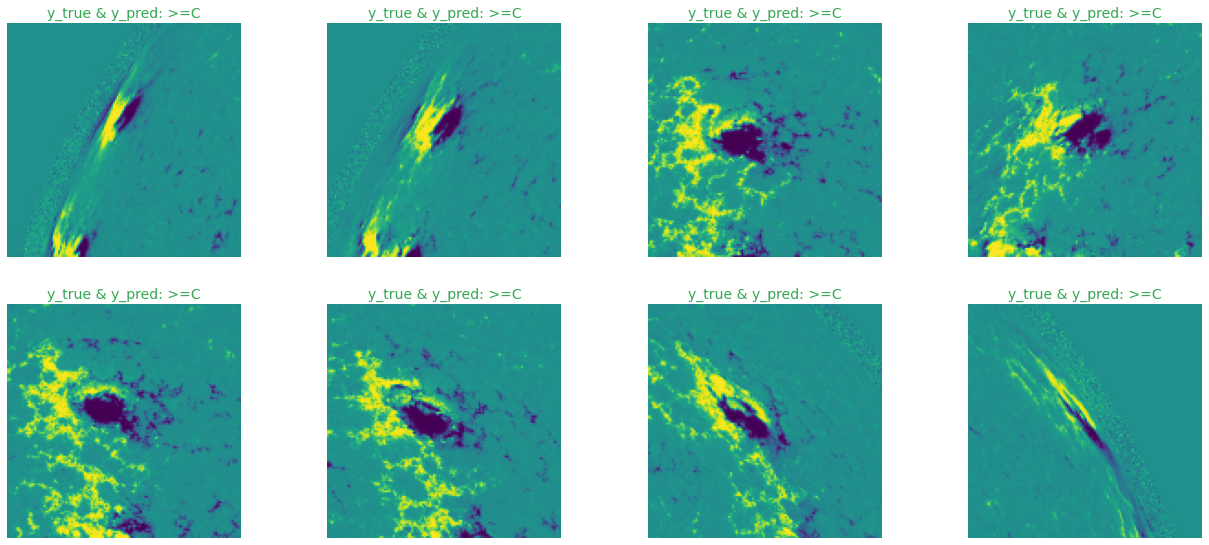

In [5]:
images = batch[0].squeeze()
y = batch[1].tolist()
plot_image_grid(images, y, y_pred, labels=["Quiet", ">=C"], columns=4, label_font_size=18)
